## 4.2. Train Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

filepath ='../data/processed/'

X_train = pd.read_csv(filepath + "X_train.csv")
X_test  = pd.read_csv(filepath + "X_test.csv")

y_train = pd.read_csv(filepath + "y_train.csv").squeeze()
y_test  = pd.read_csv(filepath + "y_test.csv").squeeze()


In [2]:
X_train.head()

,track_number_log,artist_popularity_log,artist_followers_log,album_total_tracks_log,track_duration_min_log,year,followers_per_pop_log,explicit_False,explicit_True,album_type_album,album_type_compilation,album_type_single,genres_country,genres_hip hop,genres_indie,genres_others,genres_pop,genres_soundtrack,genres_unknown
0,0.614579,0.521259,0.645978,0.140127,0.827637,2013,0.649492,False,True,True,False,False,0,0,0,0,0,0,1
1,1.229424,0.237680,0.303821,0.446419,0.922572,2015,0.305757,False,True,True,False,False,0,0,0,0,0,0,1
2,0.250259,0.494465,0.756036,1.079596,0.199471,1973,0.778771,True,False,False,True,False,0,0,0,1,0,0,0
3,-1.141020,-0.122366,-0.349355,-1.767537,0.763150,2018,-0.379164,True,False,False,False,True,0,0,0,1,0,0,0
4,-1.141020,0.326590,0.488882,-1.767537,-0.548775,2022,0.501894,False,True,False,False,True,0,0,0,0,0,0,1


In [3]:
y_train.head()

0    66
1    75
2     0
3     3
4    56
Name: track_popularity, dtype: int64

In [4]:
X_test.head()

,track_number_log,artist_popularity_log,artist_followers_log,album_total_tracks_log,track_duration_min_log,year,followers_per_pop_log,explicit_False,explicit_True,album_type_album,album_type_compilation,album_type_single,genres_country,genres_hip hop,genres_indie,genres_others,genres_pop,genres_soundtrack,genres_unknown
0,1.410646,0.207240,0.169682,0.735944,0.245582,2016,0.158198,True,False,True,False,False,0,0,0,1,0,0,0
1,1.410646,0.573903,0.893617,0.629386,0.254745,2016,0.922472,False,True,True,False,False,1,1,0,0,1,0,0
2,0.445475,0.599768,0.588090,0.446419,1.402950,2011,0.571279,False,True,True,False,False,0,1,0,1,0,0,0
3,-0.263220,-2.580269,-2.583391,-0.791973,0.180885,2025,-2.517356,True,False,False,False,True,0,0,0,0,0,0,1
4,0.019368,-0.639428,-0.397482,0.225348,1.231828,2014,-0.351849,False,True,True,False,False,0,0,0,1,0,0,0


In [5]:
y_test.head()

0    37
1    55
2    78
3    33
4    55
Name: track_popularity, dtype: int64

### 1. Written Explanation
#### 1.1. Mục tiêu phân tích
- Dự đoán track_popularity của một bài hát dựa trên các đặc trưng audio, thông tin album, nghệ sĩ, và thể loại.
- Xác định mô hình ML phù hợp, đánh giá hiệu quả dựa trên các metric phổ biến (RMSE, MAE, R²)

#### 1.2. Thiết lập bài toán
- Loại bài toán: Regression (dự đoán giá trị liên tục)
- Target: track_popularity (0–100)
- Features: Numeric (các thông số track, artist, album), Categorical (explicit, album_type), Multi-label genres.

#### 1.3. Quy trình phân tích

1. Chia dữ liệu: Tách thành tập train (67%) và test (33%) để đánh giá mô hình.

2. Xây dựng mô hình ML:

#### **Random Forest Regressor:** mô hình ensemble dựa trên cây quyết định, ưu điểm:

- Xử lý non-linear relationships tốt
- Ít nhạy cảm với outliers và feature scaling
- Cung cấp feature importance trực quan

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
r2_rf   = r2_score(y_test, y_pred_rf)

print("Random Forest")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE : {mae_rf:.4f}")
print(f"R²  : {r2_rf:.4f}")


Random Forest
RMSE: 19.1711
MAE : 14.0420
R²  : 0.3708


- Trực quan hóa kết quả Scatter plot: Dự đoán vs Thực tế

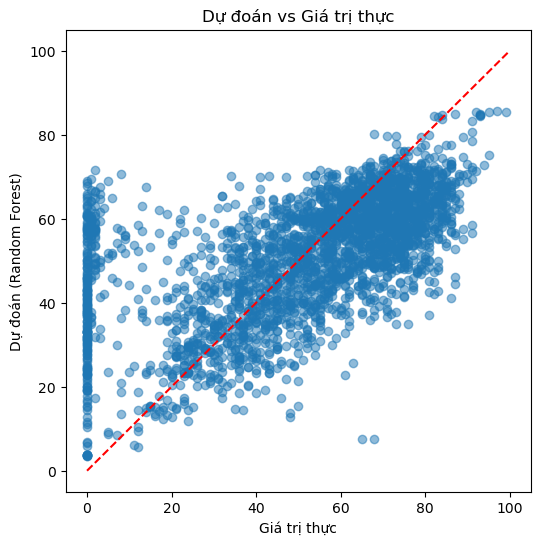

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel("Giá trị thực")
plt.ylabel("Dự đoán (Random Forest)")
plt.title("Dự đoán vs Giá trị thực")
plt.show()

**Nhận xét:**
- Mức độ tương quan: Các điểm dữ liệu tập trung khá sát đường nét đứt màu đỏ, cho thấy mô hình Random Forest có khả năng dự đoán tương đối tốt xu hướng chung của dữ liệu.
- Hiện tượng sai số tại giá trị thấp: Có một dải điểm dọc tại vị trí Giá trị thực = 0 nhưng dự đoán lại trải dài từ 0 đến 70. Điều này cho thấy mô hình đang bị sai số lớn (overestimate) đối với các trường hợp thực tế bằng không.
- Xu hướng dự đoán: Ở các giá trị cao (trên 80), mô hình có xu hướng dự đoán thấp hơn một chút so với giá trị thực tế (nằm dưới đường 45 độ).
- Độ phân tán: Dữ liệu có độ nhiễu (variance) nhất định, đặc biệt là ở khoảng giá trị thực từ 20 đến 60, thể hiện qua việc các điểm xanh nằm rải rác xa đường lý tưởng.

#### **Gradient Boosting Regressor:** ensemble boosting, ưu điểm:

- Học từng cây để giảm lỗi còn sót lại
- Thường có hiệu quả tốt hơn trên dữ liệu phức tạp với nhiều tính năng tương tác

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr  = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr   = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting")
print(f"RMSE: {rmse_gbr:.4f}")
print(f"MAE : {mae_gbr:.4f}")
print(f"R²  : {r2_gbr:.4f}")


Gradient Boosting
RMSE: 19.3630
MAE : 14.4439
R²  : 0.3582


- Trực quan hóa kết quả bằng biểu đồ Scatter plot: Dự đoán vs Thực tế

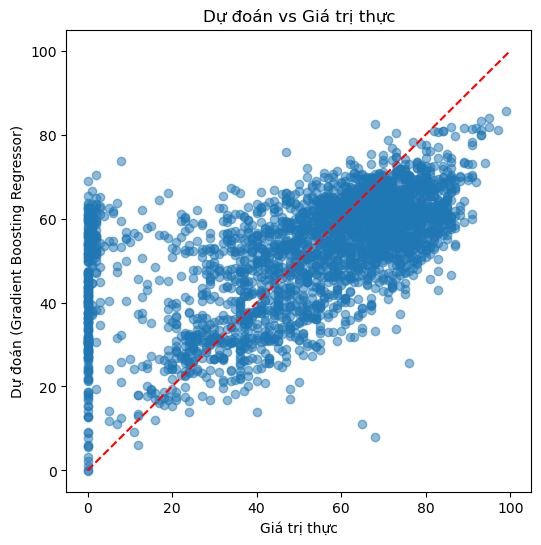

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([0, 100], [0, 100], 'r--')  
plt.xlabel("Giá trị thực")
plt.ylabel("Dự đoán (Gradient Boosting Regressor)")
plt.title("Dự đoán vs Giá trị thực")
plt.show()

**Nhận xét:**
- Mức độ tương quan: Các điểm dữ liệu tập trung khá sát đường nét đứt màu đỏ, cho thấy mô hình Random Forest có khả năng dự đoán tương đối tốt xu hướng chung của dữ liệu.
- Hiện tượng sai số tại giá trị thấp: Có một dải điểm dọc tại vị trí Giá trị thực = 0 nhưng dự đoán lại trải dài từ 0 đến 70. Điều này cho thấy mô hình đang bị sai số lớn (overestimate) đối với các trường hợp thực tế bằng không.
- Xu hướng dự đoán: Ở các giá trị cao (trên 80), mô hình có xu hướng dự đoán thấp hơn một chút so với giá trị thực tế (nằm dưới đường 45 độ).
- Độ phân tán: Dữ liệu có độ nhiễu (variance) nhất định, đặc biệt là ở khoảng giá trị thực từ 20 đến 60, thể hiện qua việc các điểm xanh nằm rải rác xa đường lý tưởng.

#### 1.4. So sánh hiệu năng mô hình
| Mô hình           | RMSE    | MAE     | R²     |
| ----------------- | ------- | ------- | ------ |
| Random Forest     | 19.1711 | 14.0420 | 0.3708 |
| Gradient Boosting | 19.3630 | 14.4439 | 0.3582 |

**Nhận xét:**
- Cả hai mô hình đều dự đoán `track_popularity` với độ chính xác trung bình khá.
- Random Forest có hiệu năng nhỉnh hơn:
    - RMSE và MAE thấp hơn → sai số trung bình nhỏ hơn.
    - R² cao hơn → mô hình giải thích được nhiều phương sai hơn trong dữ liệu.  

- Gradient Boosting cũng đạt kết quả tương tự nhưng hơi thấp hơn về R², có thể do learning_rate và max_depth chưa tối ưu.


#### 1.5. Diễn giải ý nghĩa của các metric
- RMSE (Root Mean Squared Error): sai số trung bình của dự đoán, nhạy với outliers.
- MAE (Mean Absolute Error): sai số tuyệt đối trung bình, dễ diễn giải hơn.
- R² score: phần phương sai dữ liệu được giải thích bởi mô hình.

#### 1.6. Những hạn chế được ghi nhận
Dựa trên kết quả dự đoán từ các mô hình Gradient Boosting và Random Forest, có các điểm yếu sau:
- Lỗi nghiêm trọng tại giá trị 0: Mô hình hoàn toàn thất bại khi dự đoán các trường hợp có giá trị thực tế bằng 0, tạo ra sai số lớn (dự đoán vọt lên mức 60-70).
- Hiện tượng Underestimation (Dự đoán thấp hơn thực tế): Tại dải giá trị cao (tiến sát mốc 100), các điểm dữ liệu nằm dưới đường đỏ, cho thấy mô hình không thể đạt tới ngưỡng giá trị tối đa của thực tế.
- Độ phân tán (Variance) cao: Các điểm dữ liệu không bám sát đường lý tưởng mà rải rác rộng, đặc biệt là ở dải 20 - 60, chứng tỏ mô hình còn nhiều nhiễu.
- Mất cân bằng hiệu suất: Mô hình dự đoán tốt nhất ở dải trung bình (nơi tập trung nhiều dữ liệu nhất) và kém chính xác dần về hai phía cực đoan.

#### 1.7. Trả lời câu hỏi phần 3.4.
Trả lời dựa trên dữ liệu
- Kết quả đánh giá cho thấy cả hai mô hình học máy Random Forest và Gradient Boosting đều có khả năng dự đoán `track_popularity` ở mức trung bình.
- Cụ thể, Random Forest đạt kết quả tốt hơn một chút với RMSE = 19.17, MAE = 14.04 và R² = 0.3708, trong khi Gradient Boosting có RMSE = 19.36, MAE = 14.44 và R² = 0.3582. Điều này cho thấy Random Forest giải thích được khoảng 37% phương sai của `track_popularity`, cao hơn Gradient Boosting nhưng sự chênh lệch không lớn.
- Quan sát biểu đồ Dự đoán vs Giá trị thực cho thấy các điểm dữ liệu có xu hướng phân bố dọc theo đường chéo lý tưởng, chứng tỏ mô hình đã học được xu hướng tổng quát của dữ liệu. Tuy nhiên, các điểm vẫn phân tán khá rộng, đặc biệt ở các giá trị phổ biến thấp và cao, cho thấy mô hình còn gặp khó khăn trong việc dự đoán chính xác từng bài hát cụ thể.

Kết luận:  
- Các mô hình học máy có thể dự đoán `track_popularity` ở mức độ nhất định dựa trên các đặc trưng hiện có, nhưng hiệu quả dự đoán chưa cao. Kết quả này cho thấy độ phổ biến của bài hát không chỉ phụ thuộc vào các đặc trưng được sử dụng trong mô hình mà còn chịu ảnh hưởng bởi nhiều yếu tố khó định lượng khác như xu hướng thị trường, viral effect, chiến dịch marketing hoặc hành vi người nghe theo thời gian.